# Plotting routines in `touchsim`
The `touchsim` package uses `holoviews` for plotting.

In [1]:
import touchsim as ts
from touchsim.plotting import plot
import matplotlib.pyplot as plt
import numpy as np

## Hand model

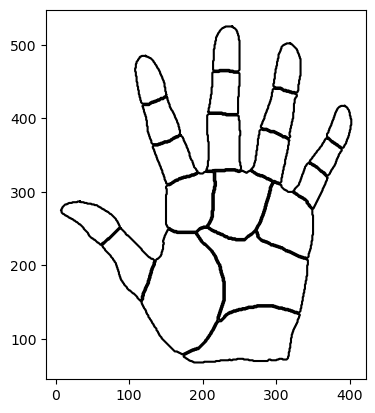

In [2]:
plot() # short for plot(ts.hand_surface)

Regions labels and the coordinate system can be overlaid on the plot.

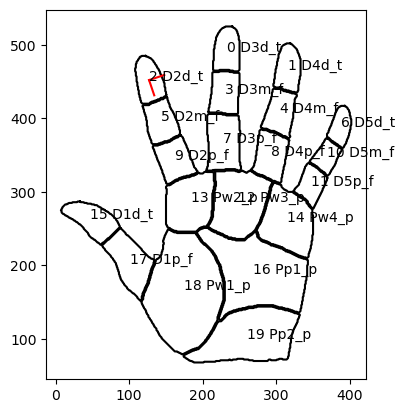

In [8]:
plot(tags=True,coord=10) # coord sets the lengths of the coordinate axes in mm

## Visualising `AfferentPopulation` objects

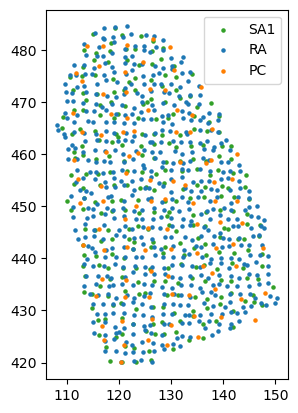

In [54]:
a = ts.affpop_hand(region='D2d')
plot(a,size=5)

Spatial plots can be overlaid on the hand outline or individual parts of it

In [14]:
?a

Type:           AfferentPopulation
String form:    AfferentPopulation with 959 afferent(s): 287 SA1, 570 RA, 102 PC.
Length:         959
File:           c:\users\user\documents\github\touchsim\touchsim\classes.py
Docstring:     
A population of afferents.
    
Init docstring:
Initializes an AfferentPopulation object.

Args:
    a1, a2, ... (Afferent): Afferent objects.

Kwargs:
    surface (Surface object): The surface on which Afferent is located
        (default: a1.surface if set, otherwise null_surface).

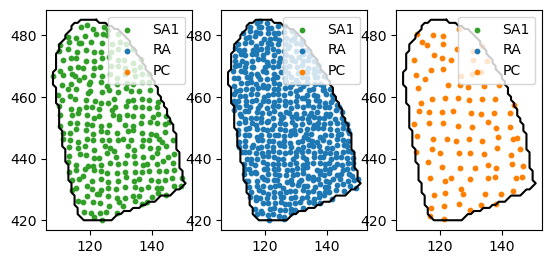

In [15]:
_,(ax1,ax2,ax3) = plt.subplots(1,3)
plt.sca(ax1)
plot(region='D2d')
plot(a['SA1'],size=10)

plt.sca(ax2)
plot(region='D2d')
plot(a['RA'],size=10)

plt.sca(ax3)
plot(region='D2d')
plot(a['PC'],size=10)

## Visualising `Stimulus` objects
Plotting a `Stimulus` object shows the trace of all pins by default.

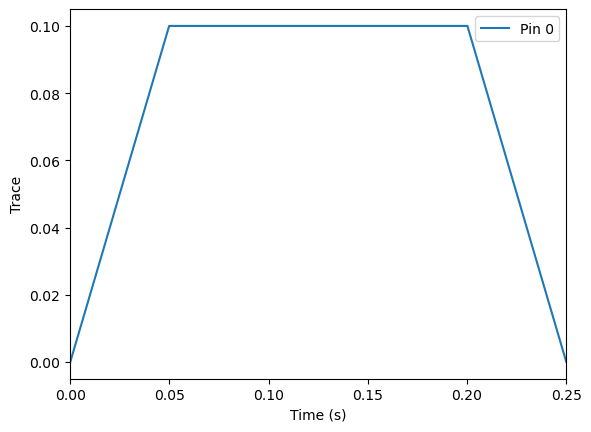

In [39]:
s = ts.stim_ramp(len=0.25,amp=.1,ramp_len=0.05)
plot(s)

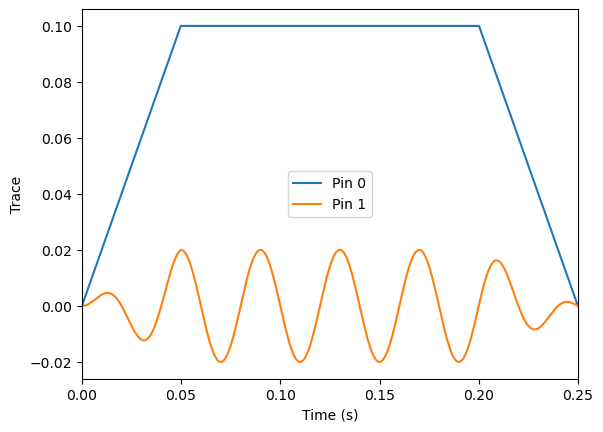

In [40]:
s += ts.stim_sine(freq=25.,len=.25,loc=[1.,1.])
plot(s)

Pin positions can also be shown spatially.

C:\Users\USER\Documents\GitHub\touchsim\touchsim\classes.py:315: UserWarning: Pin radius too big and has been adjusted to 0.3
  warnings.warn(


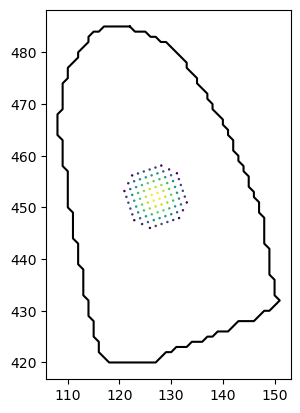

In [48]:
s = ts.stim_indent_shape(ts.shape_circle(hdiff=0.1,pins_per_mm=2,radius=3),ts.stim_ramp(len=0.1))
plot(region='D2d')
plot(s,spatial=True)

## Visualising `Response` objects
Plotting a `Response` object shows the spike trains of all included neurons

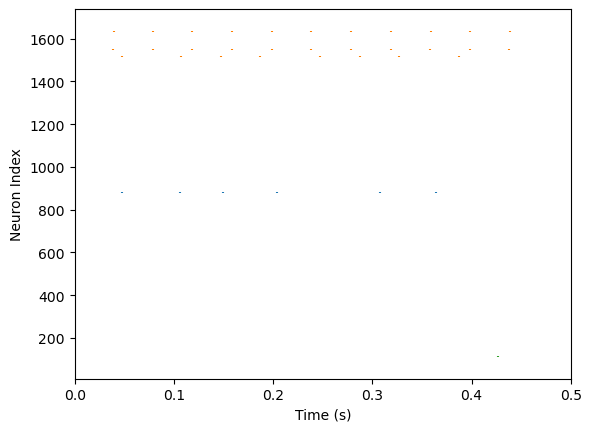

In [49]:
a = ts.affpop_hand(region='D2')
s = ts.stim_sine(freq=50.,amp=0.1,len=0.5)
r = a.response(s)
plot(r)

Responses can be shown within a certain time window.

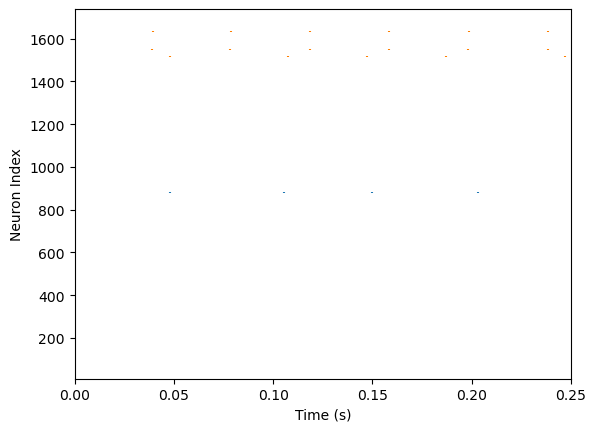

In [50]:
plot(r,bin=[0,0.25])

Responses can also be plotted spatially, in which case the size of each dot scaled with the neuron's firing rate.

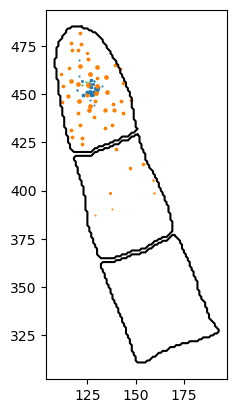

In [51]:
plot(region='D2')
plot(r,spatial=True,scaling_factor=.25)

Alternatively, firing rate can be indicated by color instead:

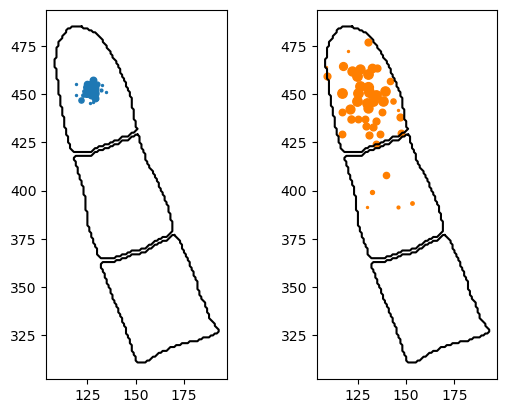

In [45]:
_,(ax1,ax2) = plt.subplots(1,2)
plt.sca(ax1)
plot(region='D2')
plot(r[r.aff['RA']],spatial=True,scale=False)

plt.sca(ax2)
plot(region='D2')
plot(r[r.aff['PC']],spatial=True,scale=False)

### Advanced example (might be slow to compute)

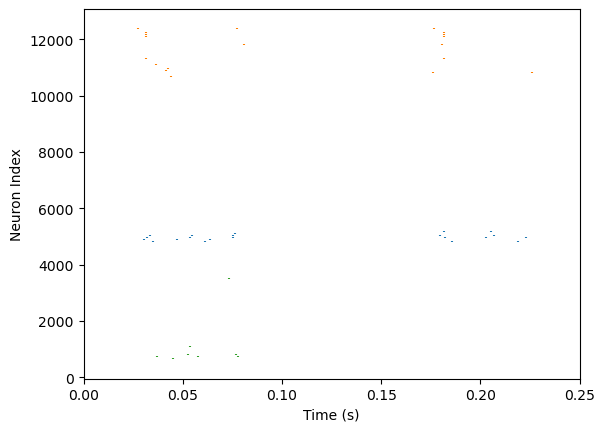

In [47]:
contact_locs = np.zeros((2,2))
contact_locs[0] = np.array([0.,0.])
contact_locs[1] = np.array([150.,0])
    
a = ts.affpop_hand(noisy=False)
s = ts.stim_indent_shape(contact_locs,ts.stim_ramp(amp=0.75,len=.2,ramp_len=0.05,ramp_type='lin',pin_radius=5.,pad_len=0.025))
r = a.response(s)
plot(r)